# SALES FORECASTING (TIME SERIES)

### Objective: Analyze and forecast monthly care sales data 

***

## Data Loading and Preprocessing:

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pandas as pd

In [73]:
df=pd.read_csv(r"C:\Users\ATHIRA S\Downloads\monthly-car-sales.csv")
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [74]:
df.tail()

,Month,Sales
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180
107,1968-12,14577


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [76]:
df['Month']=pd.to_datetime(df['Month'])

In [77]:
df.head()

,Month,Sales
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [78]:
df.set_index('Month',inplace=True)

In [79]:
df.head()

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


In [80]:
df.describe()

,Sales
count,108.000000
mean,14595.111111
std,4525.213913
min,5568.000000
25%,11391.250000
50%,14076.000000
75%,17595.750000
max,26099.000000


<AxesSubplot:xlabel='Month'>

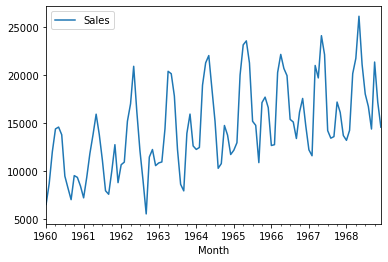

In [81]:
df.plot()

- Plots shows non-stationary behaviour

In [82]:
import statsmodels.api as sm
ts=sm.tsa.seasonal_decompose(df['Sales'],model='additive')

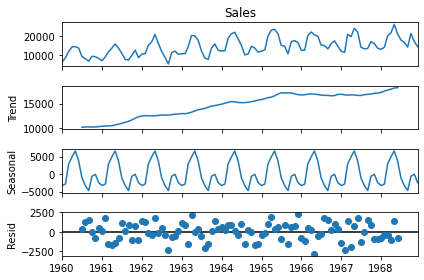

In [83]:
ts.plot()
plt.show()

- There is an upward trend
- Seasonality is present

## Stationarity Testing:

In [84]:
from statsmodels.tsa.stattools import adfuller

In [85]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels=['ADF test Statistics','p-value','Lags used','No: of observatin used']
    for value,label in zip(result,labels):
        print(label+':'+str(value))
    if result[1]<=0.05:
        print('Reject Ho, hence it is stationary')
    else:
        print('Failed to reject Ho, it is non stationary')

In [86]:
adfuller_test(df['Sales'])

ADF test Statistics:-1.223812766175284
p-value:0.6632691049832868
Lags used:12
No: of observatin used:95
Failed to reject Ho, it is non stationary


## Differencing

In [87]:
df['Sales First Difference']=df['Sales']-df['Sales'].shift(1)

In [88]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [89]:
df.head(15)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1960-01-01,6550,NaN,NaN
1960-02-01,8728,2178.0,NaN
1960-03-01,12026,3298.0,NaN
1960-04-01,14395,2369.0,NaN
1960-05-01,14587,192.0,NaN
1960-06-01,13791,-796.0,NaN
1960-07-01,9498,-4293.0,NaN
1960-08-01,8251,-1247.0,NaN
1960-09-01,7049,-1202.0,NaN


In [90]:
adfuller_test(df['Sales First Difference'].dropna())

ADF test Statistics:-6.199799230800689
p-value:5.8447525992770054e-08
Lags used:11
No: of observatin used:95
Reject Ho, hence it is stationary


In [91]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF test Statistics:-3.644396602406015
p-value:0.004966833586579731
Lags used:11
No: of observatin used:84
Reject Ho, hence it is stationary


## ARIMA Model Selection:

In [107]:
from pmdarima.arima import auto_arima

stepwise_model = auto_arima(df['Sales'],start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=1, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1685.335, Time=0.64 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1734.790, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1697.103, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1684.051, Time=0.38 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1700.383, Time=0.11 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1685.343, Time=0.47 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1685.558, Time=0.91 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1684.012, Time=0.30 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1685.195, Time=0.84 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.71 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1719.017, Time=0.09 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1684.828, Time=0.49 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=1685.189, Time=0.44 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=inf, Time=0.85 sec
 ARIMA(0,1,1)(1,1,0)[12] inte

## Model Fitting and Forecasting:

We’ll train on 7 years of data, from the years 1960–1967 and test our forecast on the years after that and compare it to the real data:

In [108]:
train=df.loc['1960-01-01':'1967-12-01']
test=df.loc['1968-01-01':]

In [109]:
stepwise_model.fit(train['Sales'])

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [110]:
test.shape

(12, 3)

In [111]:
forecast=stepwise_model.predict(n_periods=12)

In [112]:
forecast=pd.DataFrame(forecast,index=test.index,columns=['Prediction'])

In [113]:
forecast_compare_df=pd.concat([test,forecast],axis=1)
forecast_compare_df = forecast_compare_df.round(2) 
forecast_compare_df.drop(columns=['Sales First Difference','Seasonal First Difference'],inplace=True)
forecast_compare_df.head(92)

,Sales,Prediction
Month,,
1968-01-01,13210,11716.02
1968-02-01,14251,11402.14
1968-03-01,20139,19965.07
1968-04-01,21725,20042.80
1968-05-01,26099,21910.68
1968-06-01,21084,20471.02
1968-07-01,18024,14021.04
1968-08-01,16722,13455.38
1968-09-01,14385,12810.48


## Model Evaluation and Visualization

In [114]:
forecast_compare_df['index'] = forecast_compare_df.index
forecast_compare_df_numpy = forecast_compare_df.to_numpy()


In [115]:
forecast_compare_df_numpy

array([[13210, 11716.02, Timestamp('1968-01-01 00:00:00')],
       [14251, 11402.14, Timestamp('1968-02-01 00:00:00')],
       [20139, 19965.07, Timestamp('1968-03-01 00:00:00')],
       [21725, 20042.8, Timestamp('1968-04-01 00:00:00')],
       [26099, 21910.68, Timestamp('1968-05-01 00:00:00')],
       [21084, 20471.02, Timestamp('1968-06-01 00:00:00')],
       [18024, 14021.04, Timestamp('1968-07-01 00:00:00')],
       [16722, 13455.38, Timestamp('1968-08-01 00:00:00')],
       [14385, 12810.48, Timestamp('1968-09-01 00:00:00')],
       [21342, 16030.82, Timestamp('1968-10-01 00:00:00')],
       [17180, 16038.62, Timestamp('1968-11-01 00:00:00')],
       [14577, 13444.62, Timestamp('1968-12-01 00:00:00')]], dtype=object)

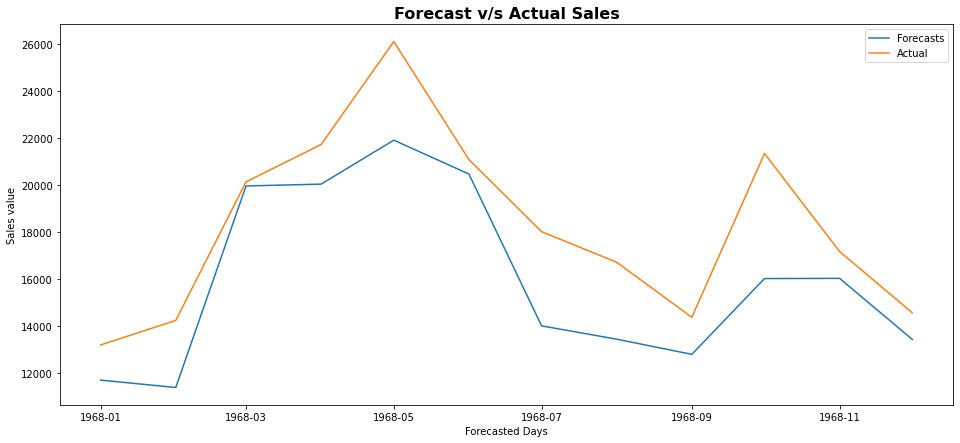

In [116]:
plt.figure(figsize=(16,7))
plt.plot(forecast_compare_df_numpy[:, 2], forecast_compare_df_numpy[:, 1], label='Forecasts')
plt.plot(forecast_compare_df_numpy[:, 2], forecast_compare_df_numpy[:, 0], label='Actual')
plt.xlabel('Forecasted Days')
plt.ylabel('Sales value')
plt.title('Forecast v/s Actual Sales',weight='bold',fontsize=16)
plt.legend()
plt.show()

In [117]:
fulldata_df = pd.concat([df['Sales'],forecast],axis=1)

Text(0.5, 1.0, 'Predicted Data with Complete Data')

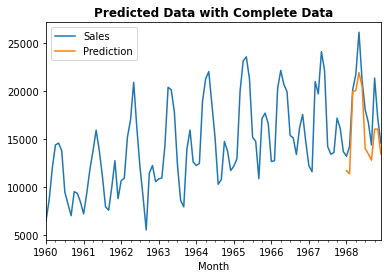

In [118]:
fulldata_df.plot()
plt.title('Predicted Data with Complete Data',weight='bold')